# Favored Products

## Imports and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_services = pd.read_csv('telecom_users.csv')
df_services.drop('num', axis=1, inplace = True)
df_services.drop('customerID', axis=1, inplace = True)
df_services.dropna(inplace = True)

#remove rows with "No internet service" from table
#df_services = df_services.replace(to_replace = 'No internet service', value = np.nan)
#df_services.dropna()

#add Y/N Internet Service Column
df_services['IS_yesno'] = np.where(df_services['InternetService'] == 'No', 'No', 'Yes')

df_services_yes = df_services[df_services['Churn'] == 'Yes']
df_services_no = df_services[df_services['Churn'] == 'No']

df_services_no.head(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IS_yesno
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,Yes
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Yes
5,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,...,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,Yes
6,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No,Yes
7,Female,0,No,No,1,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,24.9,24.90,No,Yes
8,Male,0,No,No,39,No,No phone service,DSL,No,No,...,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No,Yes
9,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.5,6382.55,No,Yes
10,Male,0,Yes,Yes,52,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85,No,Yes


## Online Services

Churn                                                           Yes   All  \
PhoneService IS_yesno StreamingMovies     StreamingTV                       
No           Yes      No                  No                     68    68   
                                          Yes                    17    17   
                      Yes                 No                     26    26   
                                          Yes                    38    38   
Yes          No       No internet service No internet service    99    99   
             Yes      No                  No                    524   524   
                                          Yes                   183   183   
                      Yes                 No                    181   181   
                                          Yes                   451   451   
All                                                            1587  1587   

Churn                                                              Loss  
PhoneService IS_yesno StreamingMovies     StreamingTV                    
No           Yes      No                  No                   0.263566  
                                          Yes                  0.232877  
                      Yes                 No                   0.305882  
                                          Yes                  0.220930  
Yes          No       No internet service No internet service  0.077043  
             Yes      No                  No                   0.361130  
                                          Yes                  0.320490  
                      Yes                 No                   0.304714  
                                          Yes                  0.303295  
All                                                            0.265562

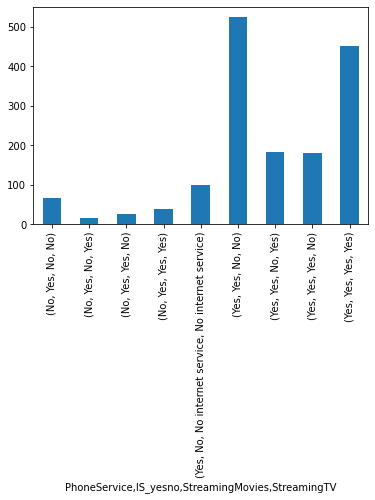

In [2]:
df_is_yes = pd.crosstab([df_services_yes['PhoneService'], df_services_yes['IS_yesno'], df_services_yes['StreamingMovies'], df_services_yes['StreamingTV']], [df_services_yes['Churn']], margins=True)
df_is_no = pd.crosstab([df_services_no['PhoneService'], df_services_no['IS_yesno'], df_services_no['StreamingMovies'], df_services_no['StreamingTV']], [df_services_no['Churn']], margins=True)
df_is_yes['Loss'] = df_is_yes['Yes']/(df_is_yes['Yes'] + df_is_no['No'])
df_is_yes['Yes'][:-1].plot(kind='bar')

df_is_yes

Insights:
    
Top 5 Services (all include phone)
1.  Phone and Internet
2.  All
3.  Phone, Internet, TV
4.  Phone, Internet, Movies
5.  Phone only
6.  Internet only 

Beyond those stayers wanting basic phone and internet, people prefer larger packages.  The tallest bars suggest two type of customers -- ones who want the basics and ones who are willing to buy everything.  

## Extra Services

In [3]:
df_onlines_yes = pd.crosstab([df_services_yes['OnlineSecurity'], df_services_yes['OnlineBackup'], df_services_yes['DeviceProtection'], df_services_yes['TechSupport']], df_services_yes['Churn'], margins=True)
df_onlines_no = pd.crosstab([df_services_no['OnlineSecurity'], df_services_no['OnlineBackup'], df_services_no['DeviceProtection'], df_services_no['TechSupport']], df_services_no['Churn'], margins=True)
df_onlines_yes['Loss'] = df_onlines_yes['Yes']/(df_onlines_yes['Yes'] + df_onlines_no['No'])
df_onlines_yes

Churn                                                                             Yes  \
OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport                 
No                  No                  No                  No                    614   
                                                            Yes                    66   
                                        Yes                 No                    169   
                                                            Yes                    49   
                    Yes                 No                  No                    170   
                                                            Yes                    35   
                                        Yes                 No                    108   
                                                            Yes                    31   
No internet service No internet service No internet service No internet service    99   
Yes                 No                  No                  No                     70   
                                                            Yes                    21   
                                        Yes                 No                     28   
                                                            Yes                    21   
                    Yes                 No                  No                     34   
                                                            Yes                    21   
                                        Yes                 No                     29   
                                                            Yes                    22   
All                                                                              1587   

Churn                                                                             All  \
OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport                 
No                  No                  No                  No                    614   
                                                            Yes                    66   
                                        Yes                 No                    169   
                                                            Yes                    49   
                    Yes                 No                  No                    170   
                                                            Yes                    35   
                                        Yes                 No                    108   
                                                            Yes                    31   
No internet service No internet service No internet service No internet service    99   
Yes                 No                  No                  No                     70   
                                                            Yes                    21   
                                        Yes                 No                     28   
                                                            Yes                    21   
                    Yes                 No                  No                     34   
                                                            Yes                    21   
                                        Yes                 No                     29   
                                                            Yes                    22   
All                                                                              1587   

Churn                                                                                Loss  
OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport                    
No                  No                  No                  No                   0.567468  
                                                            Yes                  0.317308  
                                        Yes                 No        

Insights:  
    
* leaving customers by far prefer no products (614) or few products (single are <200 each and down from there with more services)

# Services Over Time

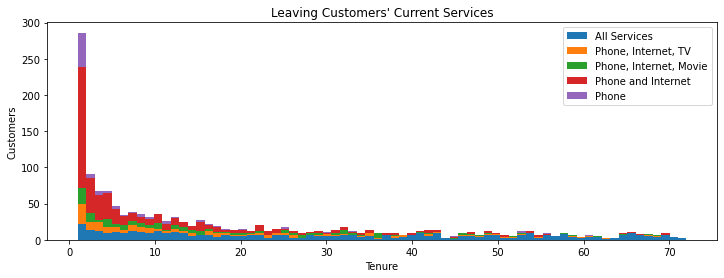

In [4]:
allservices_ten = df_services_yes[(df_services_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services_yes['PhoneService'] == 'Yes') & (df_services_yes['StreamingTV'] == 'Yes') & (df_services_yes['StreamingMovies'] == 'Yes'))]['tenure']
phoneint_ten = df_services_yes[(df_services_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services_yes['PhoneService'] == 'Yes') & (df_services_yes['StreamingTV'] == 'No') & (df_services_yes['StreamingMovies'] == 'No'))]['tenure']
phoneinttv_ten = df_services_yes[(df_services_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services_yes['PhoneService'] == 'Yes') & (df_services_yes['StreamingTV'] == 'Yes') & (df_services_yes['StreamingMovies'] == 'No'))]['tenure']
phoneintmov_ten = df_services_yes[(df_services_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services_yes['PhoneService'] == 'Yes') & (df_services_yes['StreamingTV'] == 'No') & (df_services_yes['StreamingMovies'] == 'Yes'))]['tenure']
phone_ten = df_services_yes[(df_services_yes['OnlineSecurity'] == 'No internet service')]['tenure']

mpl.rcParams['figure.figsize'] = (12,4)

plt.hist([allservices_ten, phoneinttv_ten, phoneintmov_ten, phoneint_ten, phone_ten], bins = 72, stacked=True)
plt.legend(['All Services', 'Phone, Internet, TV', 'Phone, Internet, Movie','Phone and Internet', 'Phone'])
plt.title("Leaving Customers' Current Services")
plt.ylabel('Customers')
plt.xlabel('Tenure')
#plt.ylim(0, 500)
plt.savefig('services_hist_yes.jpg')



Insights: 

* most of the people who are leaving are recently joined customers who bought phone and internet  (were they trying it out?)  

* people who are leaving as long-term customers bought all services

* these people are not dropping services but dropping the service altogether, suggesting people with all services have chosen not to downgrade but leave the company entirely  

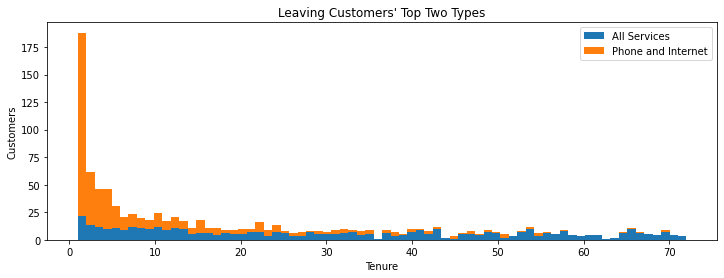

In [5]:
plt.hist([allservices_ten,phoneint_ten], bins = 72, stacked=True)
plt.legend(['All Services', 'Phone and Internet'])
plt.title("Leaving Customers' Top Two Types")
plt.ylabel('Customers')
plt.xlabel('Tenure')
plt.savefig('services_top2.jpg')


594


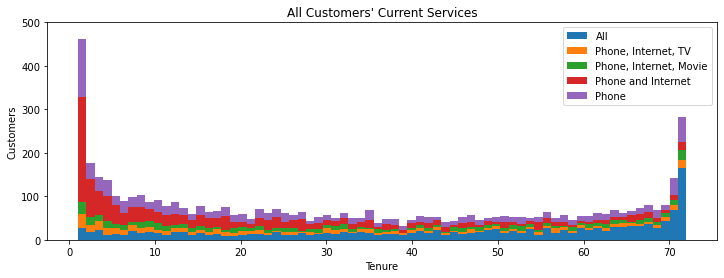

In [6]:
allservices_ten = df_services[(df_services['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services['PhoneService'] == 'Yes') & (df_services['StreamingTV'] == 'Yes') & (df_services['StreamingMovies'] == 'Yes'))]['tenure']
phoneint_ten = df_services[(df_services['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services['PhoneService'] == 'Yes') & (df_services['StreamingTV'] == 'No') & (df_services['StreamingMovies'] == 'No'))]['tenure']
phoneinttv_ten = df_services[(df_services['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services['PhoneService'] == 'Yes') & (df_services['StreamingTV'] == 'Yes') & (df_services['StreamingMovies'] == 'No'))]['tenure']
phoneintmov_ten = df_services[(df_services['InternetService'].isin(['DSL', 'Fiber optic']) & (df_services['PhoneService'] == 'Yes') & (df_services['StreamingTV'] == 'No') & (df_services['StreamingMovies'] == 'Yes'))]['tenure']
phone_ten = df_services[(df_services['OnlineSecurity'] == 'No internet service')]['tenure']

mpl.rcParams['figure.figsize'] = (12,4)

plt.hist([allservices_ten, phoneinttv_ten, phoneintmov_ten, phoneint_ten, phone_ten], bins = 72, stacked=True)
plt.legend(['All', 'Phone, Internet, TV', 'Phone, Internet, Movie','Phone and Internet', 'Phone'])
plt.title("All Customers' Current Services")
plt.ylabel('Customers')
plt.xlabel('Tenure')
plt.ylim(0, 500)
print(len(phoneintmov_ten))
plt.savefig('services_hist_all.jpg')

Insights: 

* essentially three types of customers:  phone and internet, phone, and all - indicating very different types of customers with different needs

* loyal fanbase of original customers

* earlier customers now lean towards all services, while new customers learn towards basic services

* amount of each service over middle tenure is relatively steady compared to start and end

# Add-ons Over Time

(array([[27., 16., 14., 17., 16., 12.,  5.,  7.,  7.,  9.,  4.,  9.,  9.,
          8.,  6.,  5.,  3.,  3.,  6.,  3.,  5.,  7.,  4.,  7., 11.,  5.,
          2.,  5.,  5.,  7.,  6.,  5.,  2.,  7.,  3.,  3.,  3.,  5.,  5.,
          8.,  8.,  5.,  8.,  4.,  2.,  7.,  5.,  6.,  7.,  5.,  3.,  3.,
          6.,  9.,  3.,  6.,  3.,  7.,  4.,  4.,  3.,  3.,  2.,  2.,  6.,
          7.,  5.,  7.,  4.,  8.,  3.,  4.],
        [31., 16., 14., 14., 15.,  9.,  9., 12.,  9.,  9.,  6., 12., 10.,
          4.,  5.,  3.,  8.,  6.,  5.,  4.,  7.,  4.,  5.,  8.,  8.,  2.,
          4.,  3.,  5.,  5.,  6.,  2.,  6.,  4.,  5.,  2.,  6.,  5.,  9.,
          4., 10.,  7.,  7.,  1.,  2.,  5.,  8.,  7.,  4.,  3.,  5.,  3.,
          6.,  5.,  5.,  4.,  4.,  8.,  3.,  3.,  3.,  4.,  2.,  1.,  7.,
          8.,  7.,  5.,  4.,  8.,  3.,  4.]]),
 array([ 1.        ,  1.98611111,  2.97222222,  3.95833333,  4.94444444,
         5.93055556,  6.91666667,  7.90277778,  8.88888889,  9.875     ,
        10.86111111, 1

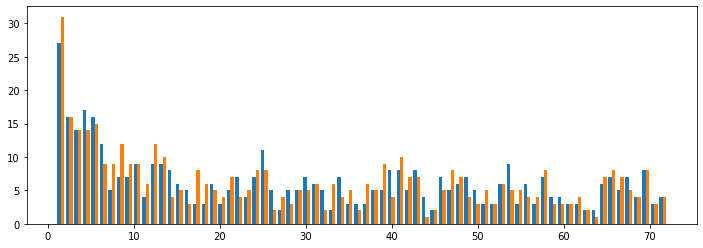

In [7]:
#addon_ten = df_services_yes[(df_services_yes['OnlineSecurity'] == 'Yes') or (df_services_yes['OnlineBackup'] == 'Yes') or (df_services_yes['DeviceProtection'] == 'Yes') or (df_services_yes['TechSupport'] == 'Yes')]['tenure']
backup_addon = df_services_yes[(df_services_yes['OnlineBackup'] == 'Yes')]['tenure']
deviceprotect_addon = df_services_yes[(df_services_yes['DeviceProtection'] == 'Yes')]['tenure']
plt.hist([backup_addon, deviceprotect_addon], bins=72)

Insights: 

* add-ons much less important to maintaining customers 

* looking at the two most popular add-ons, add-ons follow similar declining pattern over tenure but on a much smaller scale